# Check datasets stored in QCArchive

In [1]:
import os, sys
import numpy as np
import torch
import espaloma as esp
import qcportal as ptl
from collections import Counter
from openff.toolkit.topology import Molecule
from openff.qcsubmit.results import BasicResultCollection
from simtk import unit
from simtk.unit import Quantity
from matplotlib import pyplot as plt

In [2]:
client = ptl.FractalClient()

In [3]:
client.list_collections()

tagline
collection          name                                                                                           
Dataset             A Benchmark Data Set for Hydrogen Combustion       A Benchmark Data Set for Hydrogen Combustion
                    ANI-1                                         22 million off-equilibrium conformations and e...
                    ANI-1ccx                                               Coupled cluster properties for molecules
                    ANI-1x                                        Density functional theory properties for molec...
                    COMP6 ANI-MD                                  Benchmark containing MD trajectories from the ...
...                                                                                                             ...
TorsionDriveDataset OpenFF-benchmark-ligand-fragments-v2.0        Ligand fragments from the JACS benchmark systems.
                    Pfizer Discrepancy Torsion Dataset 1                                                       None
                    SMIRNOFF Coverage Torsion Set 1                                                            None
                    SiliconTX Torsion Benchmark Set 1                                                          None
                    TorsionDrive Paper                                                                         None

[206 rows x 1 columns]

In [4]:
client.list_collections("Dataset").head()

tagline
collection name                                                                                           
Dataset    A Benchmark Data Set for Hydrogen Combustion       A Benchmark Data Set for Hydrogen Combustion
           ANI-1                                         22 million off-equilibrium conformations and e...
           ANI-1ccx                                               Coupled cluster properties for molecules
           ANI-1x                                        Density functional theory properties for molec...
           COMP6 ANI-MD                                  Benchmark containing MD trajectories from the ...

In [5]:
df = client.list_collections()

In [6]:
for i, r in enumerate(df.iterrows()):
    #print("{}:\t{}\t{}".format(r[0][0], r[0][1], r[1]))
    print(i, r[0], r[1][0])

0 ('Dataset', 'A Benchmark Data Set for Hydrogen Combustion') A Benchmark Data Set for Hydrogen Combustion
1 ('Dataset', 'ANI-1') 22 million off-equilibrium conformations and enegies for organic molecules
2 ('Dataset', 'ANI-1ccx') Coupled cluster properties for molecules
3 ('Dataset', 'ANI-1x') Density functional theory properties for molecules
4 ('Dataset', 'COMP6 ANI-MD') Benchmark containing MD trajectories from the ANI-1x potential.
5 ('Dataset', 'COMP6 DrugBank') Benchmark containing DrugBank off-equilibrium molecules.
6 ('Dataset', 'COMP6 GDB10to13') Benchmark containing off-equilibrium molecules from GDB13 with 10 to 13 heavy atoms.
7 ('Dataset', 'COMP6 GDB7to9') Benchmark containing off-equilibrium molecules from GDB11 with 7 to 9 heavy atoms.
8 ('Dataset', 'COMP6 S66x8') Benchmark for noncovalent interactions.
9 ('Dataset', 'COMP6 Tripeptides') Benchmark containing off-equilibrium geometries of 248 tripeptides.
10 ('Dataset', 'G-SchNet Generated') Molecules generated by G-SchN

In [7]:
for i, r in enumerate(df.iterrows()):
    #print("{}:\t{}\t{}".format(r[0][0], r[0][1], r[1]))
    if r[0][1].startswith("SPICE"):
        print(i, r[0], r[1][0])

38 ('Dataset', 'SPICE DES Monomers Single Points Dataset v1.0') QM dataset for ML
39 ('Dataset', 'SPICE DES Monomers Single Points Dataset v1.1') QM dataset for ML
40 ('Dataset', 'SPICE DES370K Single Points Dataset Supplement v1.0') QM dataset for ML
41 ('Dataset', 'SPICE DES370K Single Points Dataset v1.0') QM dataset for ML
42 ('Dataset', 'SPICE Dipeptides Single Points Dataset v1.0') QM Dataset for ML
43 ('Dataset', 'SPICE Dipeptides Single Points Dataset v1.1') QM Dataset for ML
44 ('Dataset', 'SPICE Dipeptides Single Points Dataset v1.2') QM Dataset for ML
45 ('Dataset', 'SPICE Ion Pairs Single Points Dataset v1.0') QM dataset for ML
46 ('Dataset', 'SPICE Ion Pairs Single Points Dataset v1.1') QM dataset for ML
47 ('Dataset', 'SPICE PubChem Set 1 Single Points Dataset v1.0') QM dataset for ML
48 ('Dataset', 'SPICE PubChem Set 1 Single Points Dataset v1.1') QM dataset for ML
49 ('Dataset', 'SPICE PubChem Set 1 Single Points Dataset v1.2') QM dataset for ML
50 ('Dataset', 'SPICE Pu

### GridOptimizationDataset

In [10]:
ds = client.get_collection('GridOptimizationDataset', 'OpenFF Trivalent Nitrogen Set 1')

In [12]:
ds.list_specifications()

,Description
Name,
default,Standard OpenFF gridoptimization specification.


In [21]:
record_names = list(ds.data.records)

In [23]:
len(record_names)

311

In [51]:
record = ds.get_record(record_names[15], specification='default')

In [52]:
mols = [ record.get_final_molecules()[k] for k in record.get_final_molecules().keys() ]

In [53]:
mols[-1]

NGLWidget()

### openff full optimization benchmark1

In [8]:
openff_full_opt_benchmark1 = client.get_collection('OptimizationDataset', 'OpenFF Full Optimization Benchmark 1')

In [9]:
openff_full_opt_benchmark1.list_specifications()

,Description
Name,
default,Standard OpenFF optimization quantum chemistry...


In [10]:
openff_full_opt_benchmark1.get_specification("default").qc_spec

QCSpecification(driver=<DriverEnum.gradient: 'gradient'>, method='b3lyp-d3bj', basis='dzvp', keywords='2', protocols=ResultProtocols(wavefunction=<WavefunctionProtocolEnum.none: 'none'>, stdout=True, error_correction=ErrorCorrectionProtocol(default_policy=True, policies=None), native_files=<NativeFilesProtocolEnum.none: 'none'>), program='psi4')

### openff gen2 dataset

In [11]:
openff_gen2_set1 = client.get_collection('Dataset', 'OpenFF Gen 2 Opt Set 1 Roche')
openff_gen2_set2 = client.get_collection('Dataset', 'OpenFF Gen 2 Opt Set 2 Coverage')
openff_gen2_set3 = client.get_collection('Dataset', 'OpenFF Gen 2 Opt Set 3 Pfizer Discrepancy')
openff_gen2_set4 = client.get_collection('Dataset', 'OpenFF Gen 2 Opt Set 4 eMolecules Discrepancy')
openff_gen2_set5 = client.get_collection('Dataset', 'OpenFF Gen 2 Opt Set 5 Bayer')

In [12]:
openff_gen2_set1.list_records()

,driver,program,method,basis,keywords,name
0,hessian,psi4,b3lyp-d3bj,dzvp,default,B3LYP-D3BJ/dzvp


In [13]:
openff_gen2_set2.list_records()

,driver,program,method,basis,keywords,name
0,hessian,psi4,b3lyp-d3bj,dzvp,default,B3LYP-D3BJ/dzvp


In [14]:
openff_gen2_set3.list_records()

,driver,program,method,basis,keywords,name
0,hessian,psi4,b3lyp-d3bj,dzvp,default,B3LYP-D3BJ/dzvp


In [15]:
openff_gen2_set4.list_records()

,driver,program,method,basis,keywords,name
0,hessian,psi4,b3lyp-d3bj,dzvp,default,B3LYP-D3BJ/dzvp


In [16]:
openff_gen2_set5.list_records()

,driver,program,method,basis,keywords,name
0,hessian,psi4,b3lyp-d3bj,dzvp,default,B3LYP-D3BJ/dzvp


### VEHICLE

In [19]:
vehicle = client.get_collection('Dataset', 'OpenFF VEHICLe Set 1')

In [20]:
vehicle.list_records()

,driver,program,method,basis,keywords,name
0,hessian,psi4,b3lyp-d3bj,dzvp,default,B3LYP-D3BJ/dzvp-Psi4


### RNA bgsu dataset

In [21]:
rna = client.get_collection('Dataset', 'RNA Single Point Dataset v1.0')

In [22]:
rna.list_records()

,driver,program,method,basis,keywords,name
0,gradient,psi4,wb97m-d3bj,def2-tzvppd,wb97m-d3bj/def2-tzvppd,WB97M-D3BJ/def2-tzvppd-wb97m-d3bj/def2-tzvppd
1,gradient,psi4,b3lyp,dzvp,default,B3LYP/dzvp-default
3,gradient,psi4,b3lyp-d3bj,dzvp,default,B3LYP-D3BJ/dzvp-default


In [23]:
rna_records = rna.get_records(method='wb97m-d3bj', basis='def2-tzvppd', program='psi4', keywords='wb97m-d3bj/def2-tzvppd')

In [24]:
rna_records

,record
index,
Nc1ccn([C@@H]2O[C@H](CO)[C@@H](O)[C@H]2O)c(=O)n1.Nc1ccn([C@@H]2O[C@H](CO)[C@@H](O)[C@H]2O)c(=O)n1-0,"ResultRecord(id='109526909', status='COMPLETE')"
Nc1ccn([C@@H]2O[C@H](CO)[C@@H](O)[C@H]2O)c(=O)n1.Nc1ccn([C@@H]2O[C@H](CO)[C@@H](O)[C@H]2O)c(=O)n1-1,"ResultRecord(id='109527040', status='COMPLETE')"
Nc1ccn([C@@H]2O[C@H](CO)[C@@H](O)[C@H]2O)c(=O)n1.Nc1ccn([C@@H]2O[C@H](CO)[C@@H](O)[C@H]2O)c(=O)n1-2,"ResultRecord(id='109526893', status='INCOMPLETE')"
Nc1ccn([C@@H]2O[C@H](CO)[C@@H](O)[C@H]2O)c(=O)n1.Nc1ccn([C@@H]2O[C@H](CO)[C@@H](O)[C@H]2O)c(=O)n1-3,"ResultRecord(id='109526987', status='INCOMPLETE')"
Nc1ccn([C@@H]2O[C@H](CO)[C@@H](O)[C@H]2O)c(=O)n1.Nc1ccn([C@@H]2O[C@H](CO)[C@@H](O)[C@H]2O)c(=O)n1-4,"ResultRecord(id='109527080', status='COMPLETE')"
...,...
O=c1ccn([C@@H]2O[C@H](COP(=O)([O-])O[C@@H]3[C@@H](COP(=O)([O-])O[C@@H]4[C@@H](CO)O[C@@H](n5ccc(=O)[nH]c5=O)[C@@H]4O)O[C@@H](n4ccc(=O)[nH]c4=O)[C@@H]3O)[C@@H](O)[C@H]2O)c(=O)[nH]1-73,"ResultRecord(id='109526244', status='COMPLETE')"
O=c1ccn([C@@H]2O[C@H](COP(=O)([O-])O[C@@H]3[C@@H](COP(=O)([O-])O[C@@H]4[C@@H](CO)O[C@@H](n5ccc(=O)[nH]c5=O)[C@@H]4O)O[C@@H](n4ccc(=O)[nH]c4=O)[C@@H]3O)[C@@H](O)[C@H]2O)c(=O)[nH]1-74,"ResultRecord(id='109526247', status='COMPLETE')"
O=c1ccn([C@@H]2O[C@H](COP(=O)([O-])O[C@@H]3[C@@H](COP(=O)([O-])O[C@@H]4[C@@H](CO)O[C@@H](n5ccc(=O)[nH]c5=O)[C@@H]4O)O[C@@H](n4ccc(=O)[nH]c4=O)[C@@H]3O)[C@@H](O)[C@H]2O)c(=O)[nH]1-75,"ResultRecord(id='109526273', status='COMPLETE')"


In [25]:
rna_records.record[0].dict()
#rna_records.iloc[0].record.dict()

{'id': '109526909',
 'hash_index': None,
 'procedure': 'single',
 'program': 'psi4',
 'version': 1,
 'protocols': {'wavefunction': <WavefunctionProtocolEnum.none: 'none'>},
 'extras': {'_qcfractal_tags': {'program': 'psi4', 'keywords': '35'},
  'qcvars': {'2-BODY DISPERSION CORRECTION ENERGY': -0.1072433,
   'CURRENT DIPOLE X': 13.68366705544945,
   'CURRENT DIPOLE Y': -6.483792013567729,
   'CURRENT DIPOLE Z': 6.011138387471894,
   'CURRENT ENERGY': -1783.561406822387,
   'CURRENT REFERENCE ENERGY': -1783.561406822387,
   'DFT FUNCTIONAL TOTAL ENERGY': -1783.4541635223866,
   'DFT TOTAL ENERGY': -1783.5614068223865,
   'DFT VV10 ENERGY': 0.0,
   'DFT XC ENERGY': -167.77883413435194,
   'DISPERSION CORRECTION ENERGY': -0.1072433,
   'GRID ELECTRONS ALPHA': 128.00006262168,
   'GRID ELECTRONS BETA': 128.00006262168,
   'GRID ELECTRONS TOTAL': 256.00012524336,
   'NUCLEAR REPULSION ENERGY': 3602.9164088388934,
   'ONE-ELECTRON ENERGY': -9603.994586769557,
   'PCM POLARIZATION ENERGY': 0.

In [26]:
print("records: ", len(rna_records))
print("entries: ", len(rna.get_entries()))
print("mols:    ", len(rna.get_molecules()))

records:  4489
entries:  4489
mols:     4489


In [27]:
mol = client.query_molecules(rna_records.iloc[i].record.molecule)[0]
mol

NGLWidget()

In [28]:
mol.id

'102478008'

### SPICE v1.0
https://github.com/openmm/spice-dataset/blob/1.0/downloader/config.yaml

In [29]:
subsets = [  
    'SPICE Solvated Amino Acids Single Points Dataset v1.1',
    'SPICE Dipeptides Single Points Dataset v1.2',
    'SPICE DES Monomers Single Points Dataset v1.1',
    'SPICE DES370K Single Points Dataset v1.0',
    'SPICE DES370K Single Points Dataset Supplement v1.0',
    'SPICE PubChem Set 1 Single Points Dataset v1.2',
    'SPICE PubChem Set 2 Single Points Dataset v1.2',
    'SPICE PubChem Set 3 Single Points Dataset v1.2',
    'SPICE PubChem Set 4 Single Points Dataset v1.2',
    'SPICE PubChem Set 5 Single Points Dataset v1.2',
    'SPICE PubChem Set 6 Single Points Dataset v1.2',
    'SPICE Ion Pairs Single Points Dataset v1.1'
]

In [30]:
c = client.get_collection('Dataset', 'SPICE PubChem Set 1 Single Points Dataset v1.2')

In [31]:
c.list_records()

,driver,program,method,basis,keywords,name
1,gradient,psi4,b3lyp,dzvp,openff-default,B3LYP/dzvp-openff-default
2,gradient,psi4,wb97m-d3bj,def2-tzvppd,spice_default,WB97M-D3BJ/def2-tzvppd-spice_default
3,gradient,psi4,b3lyp-d3bj,dzvp,openff-default,B3LYP-D3BJ/dzvp-openff-default


In [32]:
method = c.list_records()["method"][3]
basis = c.list_records()["basis"][3]
program = c.list_records()["program"][3]
keywords = c.list_records()["keywords"][3]
print(method, basis, program, keywords)

b3lyp-d3bj dzvp psi4 openff-default


### Pepconf Optimizationd dataset

In [33]:
openff_pepconf_opt = client.get_collection('OptimizationDataset', 'OpenFF PEPCONF OptimizationDataset v1.0')

In [34]:
openff_pepconf_opt.list_specifications()

,Description
Name,
default,Standard OpenFF optimization quantum chemistry...
ani2x-qm,QM optimization using the method/basis on whic...
default-dlc,Standard OpenFF optimization quantum chemistry...


In [35]:
record_names = list(openff_pepconf_opt.data.records)

In [36]:
record_names

['cc(=o)n[c@@h](ccc(=o)[o-])c(=o)n[c@@h](cc1ccccc1)c(n)=o-0',
 'cc(=o)n[c@@h](ccc(=o)[o-])c(=o)n[c@@h](cc1ccccc1)c(n)=o-1',
 'cc(=o)n[c@@h](co)c(=o)n[c@@h](co)c(n)=o-0',
 'cc[c@h](c)[c@h](nc(c)=o)c(=o)n[c@@h](cc1ccccc1)c(n)=o-0',
 'cc[c@h](c)[c@h](nc(c)=o)c(=o)n[c@@h](cc1ccccc1)c(n)=o-1',
 'cc(=o)n[c@@h](cc1c[nh]c2ccccc12)c(=o)n[c@@h](cc1ccc(o)cc1)c(n)=o-0',
 'cc(=o)n[c@@h](cc1c[nh]c2ccccc12)c(=o)n[c@@h](cc1ccc(o)cc1)c(n)=o-1',
 'cc(=o)n[c@@h](cc1c[nh]c2ccccc12)c(=o)n[c@@h](cc1ccc(o)cc1)c(n)=o-2',
 'cc(=o)n[c@@h](cc1c[nh]c2ccccc12)c(=o)n[c@@h](cc1ccc(o)cc1)c(n)=o-3',
 'cc(=o)n[c@@h](cccc[nh3+])c(=o)n[c@@h](cc1c[nh]c2ccccc12)c(n)=o-0',
 'cc(=o)n[c@@h](cccc[nh3+])c(=o)n[c@@h](cc1c[nh]c2ccccc12)c(n)=o-1',
 'cc(=o)n[c@@h](cccc[nh3+])c(=o)n[c@@h](cc1c[nh]c2ccccc12)c(n)=o-2',
 'cc(=o)n[c@@h](cccnc(n)=[nh2+])c(=o)n[c@@h](cc(c)c)c(n)=o-0',
 'cc(=o)n[c@@h](cccnc(n)=[nh2+])c(=o)n[c@@h](cc(c)c)c(n)=o-1',
 'cc(=o)n[c@@h](co)c(=o)n[c@h](c(n)=o)[c@@h](c)o-0',
 'cscc[c@h](nc(=o)[c@h](cc1c[nh]cn1)nc(c

In [37]:
#opt_record = openff_pepconf_opt.get_record(record_names[0], specification="default")
opt_record = openff_pepconf_opt.get_record(record_names[1], specification="default")

In [38]:
opt_record.get_trajectory()[0].dict()

{'id': '32883527',
 'hash_index': None,
 'procedure': 'single',
 'program': 'psi4',
 'version': 1,
 'protocols': {},
 'extras': {'qcvars': {'2-BODY DISPERSION CORRECTION ENERGY': -0.09519024,
   'B3LYP-D3(BJ) DISPERSION CORRECTION ENERGY': -0.09519024,
   'CURRENT DIPOLE X': 23.462968922379147,
   'CURRENT DIPOLE Y': 2.9216668402302792,
   'CURRENT DIPOLE Z': -3.9148612442004875,
   'CURRENT ENERGY': -1162.3871098026964,
   'CURRENT REFERENCE ENERGY': -1162.3871098026964,
   'DFT FUNCTIONAL TOTAL ENERGY': -1162.2919195626966,
   'DFT TOTAL ENERGY': -1162.3871098026966,
   'DFT VV10 ENERGY': 0.0,
   'DFT XC ENERGY': -127.59554580408235,
   'DISPERSION CORRECTION ENERGY': -0.09519024,
   'GRID ELECTRONS ALPHA': 88.9998592253157,
   'GRID ELECTRONS BETA': 88.9998592253157,
   'GRID ELECTRONS TOTAL': 177.9997184506314,
   'NUCLEAR REPULSION ENERGY': 2138.2471899927477,
   'ONE-ELECTRON ENERGY': -5855.27274150584,
   'PCM POLARIZATION ENERGY': 0.0,
   'PE ENERGY': 0.0,
   'SCF DIPOLE X': 23

In [39]:
opt_record.get_initial_molecule()

NGLWidget()

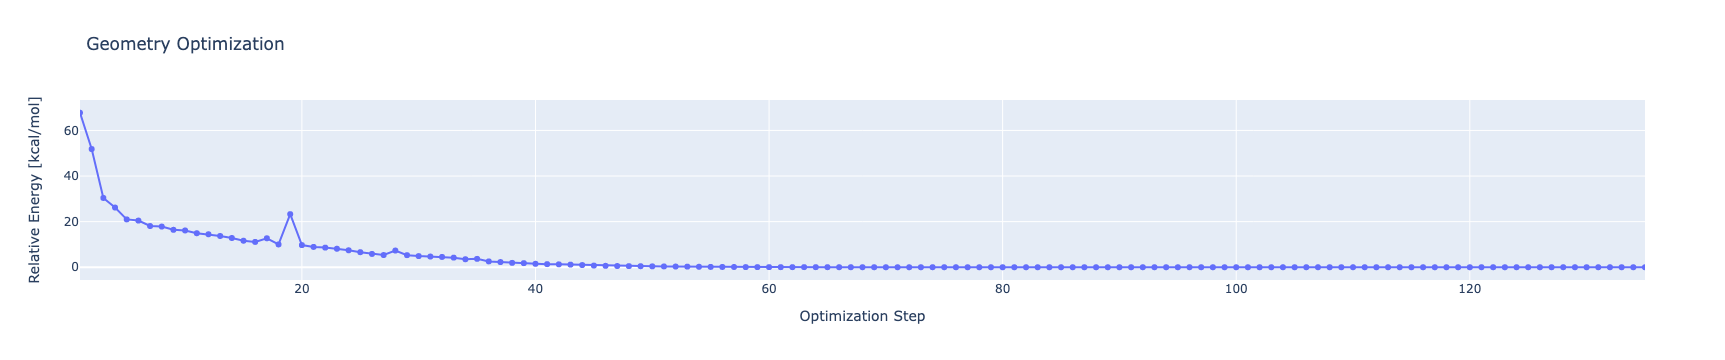

In [40]:
opt_record.show_history()

In [41]:
mols = opt_record.get_molecular_trajectory()

In [42]:
type(mols[0])

qcelemental.models.molecule.Molecule

In [43]:
offmols = Molecule.from_qcschema(mols[0])

for mol in mols[1:]:
    m = Molecule.from_qcschema(mol)
    offmols.add_conformer(m.conformers[0])    

In [44]:
offmols

NGLWidget(max_frame=134)

In [45]:
opt_record.get_final_energy()

-1162.4951011118994

In [46]:
# try default-dlc
record_names = list(openff_pepconf_opt.data.records)
#opt_record = openff_pepconf_opt.get_record(record_names[0], specification="default-dlc")
opt_record = openff_pepconf_opt.get_record(record_names[1], specification="default-dlc")
print(record_names[0])

cc(=o)n[c@@h](ccc(=o)[o-])c(=o)n[c@@h](cc1ccccc1)c(n)=o-0


In [47]:
opt_record.get_initial_molecule()

NGLWidget()

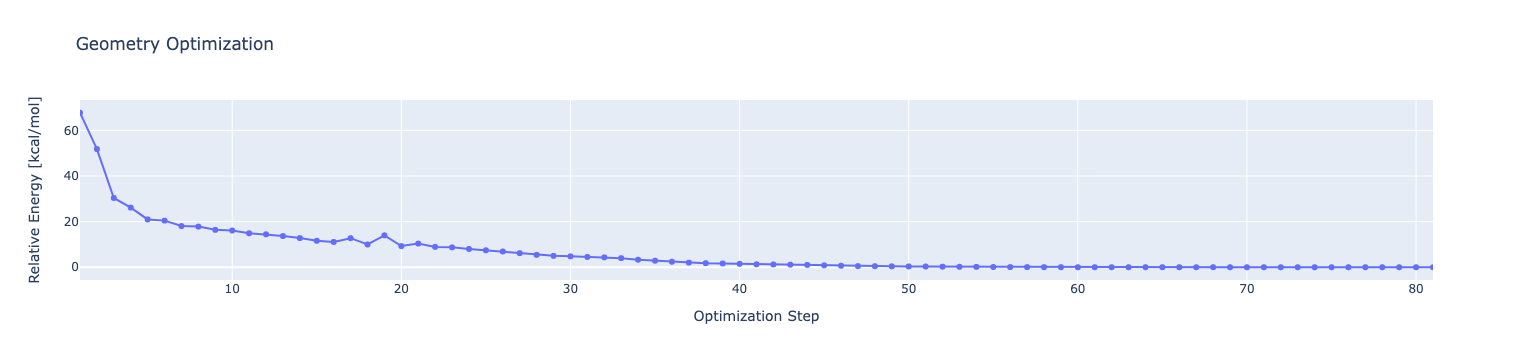

In [48]:
opt_record.show_history()

In [49]:
mols = opt_record.get_molecular_trajectory()

In [50]:
offmols = Molecule.from_qcschema(mols[0])

for mol in mols[1:]:
    m = Molecule.from_qcschema(mol)
    offmols.add_conformer(m.conformers[0])

In [51]:
offmols

NGLWidget(max_frame=80)

In [52]:
opt_record.get_final_energy()

-1162.4950636880335

##### compare energy

### Gen2 Optimization dataset

In [53]:
openff_gen2_opt_set1 = client.get_collection('OptimizationDataset', 'OpenFF Gen 2 Opt Set 1 Roche')
openff_gen2_opt_set2 = client.get_collection('OptimizationDataset', 'OpenFF Gen 2 Opt Set 2 Coverage')
openff_gen2_opt_set3 = client.get_collection('OptimizationDataset', 'OpenFF Gen 2 Opt Set 3 Pfizer Discrepancy')
openff_gen2_opt_set4 = client.get_collection('OptimizationDataset', 'OpenFF Gen 2 Opt Set 4 eMolecules Discrepancy')
openff_gen2_opt_set5 = client.get_collection('OptimizationDataset', 'OpenFF Gen 2 Opt Set 5 Bayer')

In [54]:
openff_gen2_opt_set1.list_specifications()

,Description
Name,
default,Standard OpenFF optimization quantum chemistry...


In [55]:
openff_gen2_opt_set2.list_specifications()

,Description
Name,
default,Standard OpenFF optimization quantum chemistry...


In [56]:
openff_gen2_opt_set3.list_specifications()

,Description
Name,
default,Standard OpenFF optimization quantum chemistry...


In [57]:
openff_gen2_opt_set4.list_specifications()

,Description
Name,
default,Standard OpenFF optimization quantum chemistry...


In [58]:
openff_gen2_opt_set5.list_specifications()

,Description
Name,
default,Standard OpenFF optimization quantum chemistry...


In [59]:
# vizualize trajectory
record_names = list(openff_gen2_opt_set1.data.records)
print(record_names)

['cn1c(cccc1=o)c2ccccc2oc-0', 'cn1c(cccc1=o)c2ccccc2oc-1', 'c1cc(c(=o)[nh]c1)cn2cc[nh2+]cc2-0', 'c1cc(c(=o)[nh]c1)cn2cc[nh2+]cc2-1', 'cc(c)s(=o)(=o)c1cccs1-0', 'cc(c)s(=o)(=o)c1cccs1-1', 'coc1ccccc1f-0', 'cc1ccccc1oc2ccccc2-0', 'cc1ccccc1oc2ccccc2-1', 'cc1ccccc1s(=o)(=o)n(c)c-0', 'cc1ccccc1s(=o)(=o)n(c)c-1', 'cc1ccccc1c2ccccc2c3ccccc3-0', 'cc1ccccc1c2ccccc2c3ccccc3-1', 'c1ccc(cc1)coc2ccccc2-0', 'c1ccc(cc1)coc2ccccc2-1', 'cc1ccccc1c(=o)c2ccccc2f-0', 'cc1ccccc1c(=o)c2ccccc2f-1', 'cc1ccccc1c(=o)c2ccccc2f-2', 'cc1ccccc1c(=o)c2ccccc2f-3', 'cc1ccccc1c(=o)c2ccccc2f-4', 'cc1ccccc1c(=o)c2ccccc2f-5', 'cc1ccccc1c(=o)c2ccccc2f-6', 'cc1ccccc1c(=o)c2ccccc2f-7', 'c1ccc(cc1)c[n@@]2ccccs2(=o)=o-0', 'c1ccc(cc1)c[n@@]2ccccs2(=o)=o-1', 'c1ccc(cc1)c[n@@]2ccccs2(=o)=o-2', 'c1ccc(cc1)c[n@@]2ccccs2(=o)=o-3', 'c1ccc(cc1)c[n@@]2ccccs2(=o)=o-4', 'c1cnc(nc1)cn2cc[nh2+]cc2-0', 'cc1ccccc1c(=o)n2ccccc2-0', 'cc1ccccc1c(=o)n2ccccc2-1', 'ccn1ccccc1=o-0', 'c[c@h](c1ccccc1)c2[nh]ccn2-0', 'c1ccc(cc1)c2ccccc2[c@h]3cccc(=o)

In [60]:
opt_record = openff_gen2_opt_set1.get_record(record_names[0], specification="default")
print(record_names[0])

cn1c(cccc1=o)c2ccccc2oc-0


In [61]:
opt_record.qc_spec

QCSpecification(driver=<DriverEnum.gradient: 'gradient'>, method='b3lyp-d3bj', basis='dzvp', keywords='2', protocols=ResultProtocols(wavefunction=<WavefunctionProtocolEnum.none: 'none'>, stdout=True, error_correction=ErrorCorrectionProtocol(default_policy=True, policies=None), native_files=<NativeFilesProtocolEnum.none: 'none'>), program='psi4')

In [62]:
opt_record.get_initial_molecule()

NGLWidget()

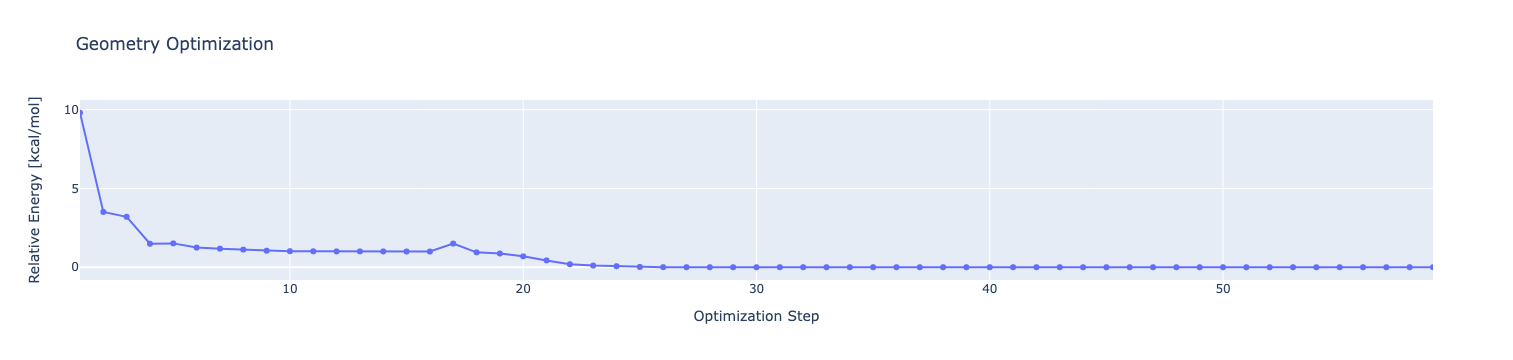

In [63]:
opt_record.show_history()

In [64]:
mols = opt_record.get_molecular_trajectory()

In [65]:
mols

[Molecule(name='C13H13NO2', formula='C13H13NO2', hash='60cc040'),
 Molecule(name='C13H13NO2', formula='C13H13NO2', hash='f7bdf5f'),
 Molecule(name='C13H13NO2', formula='C13H13NO2', hash='24fa93f'),
 Molecule(name='C13H13NO2', formula='C13H13NO2', hash='6732995'),
 Molecule(name='C13H13NO2', formula='C13H13NO2', hash='82aa65d'),
 Molecule(name='C13H13NO2', formula='C13H13NO2', hash='0e7dbc1'),
 Molecule(name='C13H13NO2', formula='C13H13NO2', hash='bbc81de'),
 Molecule(name='C13H13NO2', formula='C13H13NO2', hash='f6e7078'),
 Molecule(name='C13H13NO2', formula='C13H13NO2', hash='bdad06e'),
 Molecule(name='C13H13NO2', formula='C13H13NO2', hash='c8e8e3f'),
 Molecule(name='C13H13NO2', formula='C13H13NO2', hash='d91e97c'),
 Molecule(name='C13H13NO2', formula='C13H13NO2', hash='c8aaa5c'),
 Molecule(name='C13H13NO2', formula='C13H13NO2', hash='81dfbec'),
 Molecule(name='C13H13NO2', formula='C13H13NO2', hash='230e92f'),
 Molecule(name='C13H13NO2', formula='C13H13NO2', hash='134f884'),
 Molecule(

### TorsionDataset

In [101]:
#ds = client.get_collection("TorsionDriveDataset", "OpenFF Gen 2 Torsion Set 1 Roche")
#ds = client.get_collection("TorsionDriveDataset", "OpenFF Protein Dipeptide 2-D TorsionDrive v2.1")
#ds = client.get_collection("TorsionDriveDataset", "OpenFF Protein Capped 1-mer Sidechains v1.3")
ds = client.get_collection("TorsionDriveDataset", "OpenFF Gen 2 Torsion Set 1 Roche 2")

In [102]:
ds.list_specifications()

,Description
Name,
default,Standard OpenFF torsiondrive specification.


In [103]:
record_names = list(ds.data.records)

In [104]:
ds.status()

,default
COMPLETE,136
RUNNING,5
ERROR,1


In [105]:
len(record_names)

142

In [71]:
ds.status(["default"], collapse=False, status="COMPLETE").head()

,default
[CH3:1][CH2:2][CH2:3][NH+:4]1CCCC1,COMPLETE
[CH3:1][CH2:4][CH2:3][CH3:2],NaN
[H:1][CH2:2][C@:3]([H:4])(c1ccccc1)C(=O)N(C)C,COMPLETE
[H:4][CH2:3][CH2:2][C:1]1(COC1)C,COMPLETE
[CH2:3]([CH2:2][OH:4])[OH:1],COMPLETE


In [72]:
record_name = record_names[0]

In [73]:
record_name

'[ch3:1][ch2:2][ch2:3][nh+:4]1cccc1'

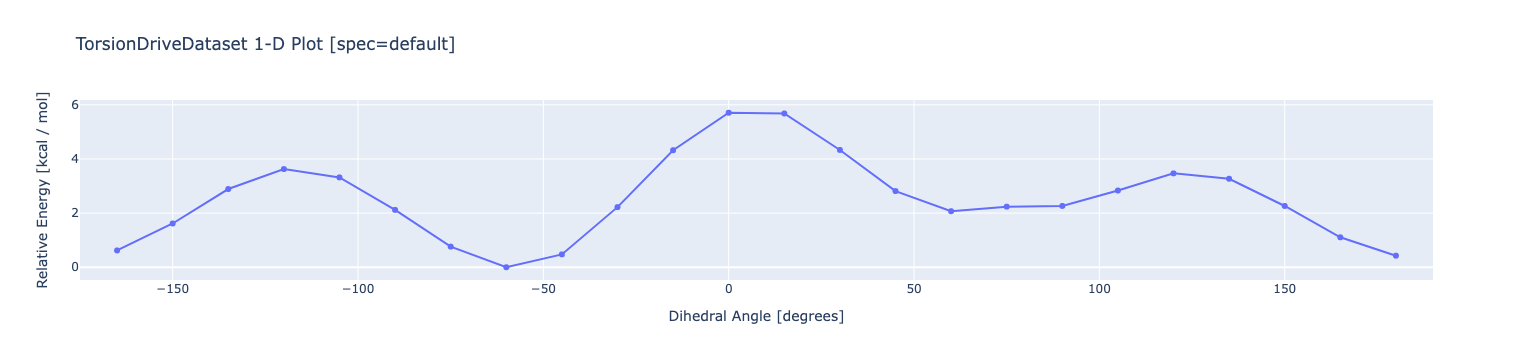

In [74]:
ds.visualize(record_name.upper(), 'default')

In [75]:
td_record = ds.get_record(record_name, specification="default") 

In [76]:
td_record.dict()

{'id': '18045308',
 'hash_index': 'eab65798470f1afee1ae335d91ce7dc0c07fee0e',
 'procedure': 'torsiondrive',
 'program': 'torsiondrive',
 'version': 1,
 'protocols': None,
 'extras': {},
 'stdout': None,
 'stderr': None,
 'error': None,
 'manager_name': None,
 'status': <RecordStatusEnum.complete: 'COMPLETE'>,
 'modified_on': datetime.datetime(2020, 3, 13, 20, 17, 43, 638434),
 'created_on': datetime.datetime(2020, 3, 13, 20, 17, 43, 638437),
 'provenance': {'creator': 'torsiondrive',
  'version': 'v0.9.8.1',
  'routine': 'torsiondrive.td_api'},
 'initial_molecule': ['756358'],
 'keywords': {'dihedrals': [(4, 5, 6, 7)],
  'grid_spacing': [15],
  'dihedral_ranges': None,
  'energy_decrease_thresh': None,
  'energy_upper_limit': 0.05},
 'optimization_spec': {'program': 'geometric',
  'keywords': {'coordsys': 'tric',
   'enforce': 0.1,
   'reset': True,
   'qccnv': True,
   'epsilon': 0}},
 'qc_spec': {'driver': <DriverEnum.gradient: 'gradient'>,
  'method': 'b3lyp-d3bj',
  'basis': 'dzvp'

In [77]:
td_record.qc_spec.method

'b3lyp-d3bj'

In [78]:
ds.get_entry(record_names[0]).attributes

{'canonical_explicit_hydrogen_smiles': '[H]C1(C(C([N+](C1([H])[H])([H])C([H])([H])C([H])([H])C([H])([H])[H])([H])[H])([H])[H])[H]',
 'canonical_isomeric_explicit_hydrogen_mapped_smiles': '[H:9][C:1]1([C:2]([C:4]([N+:8]([C:3]1([H:13])[H:14])([H:24])[C:7]([H:22])([H:23])[C:6]([H:20])([H:21])[C:5]([H:17])([H:18])[H:19])([H:15])[H:16])([H:11])[H:12])[H:10]',
 'canonical_isomeric_explicit_hydrogen_smiles': '[H]C1(C(C([N+](C1([H])[H])([H])C([H])([H])C([H])([H])C([H])([H])[H])([H])[H])([H])[H])[H]',
 'canonical_isomeric_smiles': 'CCC[NH+]1CCCC1',
 'canonical_smiles': 'CCC[NH+]1CCCC1',
 'inchi_key': 'HLNRRPIYRBBHSQ-UHFFFAOYSA-O',
 'molecular_formula': 'C7H16N',
 'provenance': 'cmiles_0+unknown_openeye_2019.Oct.2',
 'standard_inchi': 'InChI=1S/C7H15N/c1-2-5-8-6-3-4-7-8/h2-7H2,1H3/p+1',
 'unique_protomer_representation': 'CCCN1CCCC1',
 'unique_tautomer_representation': 'CCC[NH+]1CCCC1'}

In [79]:
if td_record is not None and td_record.status == 'COMPLETE':
    print('complete')

complete


In [80]:
for k, v in td_record.get_final_results().items():
    print(k)

(180,)
(-165,)
(165,)
(-150,)
(-135,)
(-120,)
(120,)
(150,)
(-105,)
(75,)
(105,)
(135,)
(-90,)
(90,)
(60,)
(-45,)
(15,)
(45,)
(-60,)
(-30,)
(0,)
(30,)
(-75,)
(-15,)


In [81]:
v.dict()

{'id': '18211381',
 'hash_index': None,
 'procedure': 'single',
 'program': 'psi4',
 'version': 1,
 'protocols': {},
 'extras': {'qcvars': {'-D ENERGY': -0.03683408,
   'B3LYP-D3(BJ) DISPERSION CORRECTION ENERGY': -0.03683408,
   'CURRENT DIPOLE X': 11.151553524532934,
   'CURRENT DIPOLE Y': -9.04257787510606,
   'CURRENT DIPOLE Z': -5.550154464424103,
   'CURRENT ENERGY': -330.9691636782264,
   'CURRENT REFERENCE ENERGY': -330.9691636782264,
   'DFT FUNCTIONAL TOTAL ENERGY': -330.9323295982264,
   'DFT TOTAL ENERGY': -330.9691636782264,
   'DFT VV10 ENERGY': 0.0,
   'DFT XC ENERGY': -40.89104090070066,
   'DISPERSION CORRECTION ENERGY': -0.03683408,
   'NUCLEAR REPULSION ENERGY': 417.54819304411564,
   'ONE-ELECTRON ENERGY': -1260.0831499480344,
   'PCM POLARIZATION ENERGY': 0.0,
   'SCF DIPOLE X': 11.151553524532934,
   'SCF DIPOLE Y': -9.04257787510606,
   'SCF DIPOLE Z': -5.550154464424103,
   'SCF ITERATION ENERGY': -330.9691636782264,
   'SCF ITERATIONS': 12.0,
   'SCF QUADRUPOLE

In [82]:
v.properties.return_energy

-330.9691636782264

In [83]:
v.return_result

array([[-1.0133207239760190e-05, -2.3729769181531947e-06,
         1.2542583545883154e-05],
       [ 4.5225707702559507e-06, -3.6190969989044399e-06,
         2.0087313780290609e-06],
       [-2.2136115619430099e-05, -1.1128401945894218e-05,
        -1.2212377042566410e-05],
       [ 1.1389383052423218e-05,  1.4447059564753092e-05,
         5.4291262242001375e-06],
       [-3.1675315921599260e-03,  3.0571491801887419e-03,
        -6.7292926330556025e-04],
       [ 6.0137785867234225e-03, -5.4961642696160851e-03,
         8.1787767313846104e-04],
       [-6.3536343325443457e-03,  5.1991840625607699e-03,
         2.1946394550669999e-04],
       [ 3.5046923981457974e-03, -2.6835105462717865e-03,
        -3.7180714964734382e-04],
       [ 1.1785870773578592e-05, -9.7655909018165576e-06,
        -1.7938405309366829e-05],
       [ 1.8804769162447030e-05,  1.7635719880175764e-05,
         1.1923431074080404e-05],
       [-9.8376419678972348e-06,  5.1032846364042986e-06,
        -1.01405018108

In [84]:
td_record.get_final_molecules

<bound method TorsionDriveRecord.get_final_molecules of TorsionDriveRecord(id='18045308', status='COMPLETE')>

In [117]:
for k, v in td_record.get_final_molecules().items():
    print(k)

(45,)
(60,)
(90,)
(15,)
(75,)
(30,)
(120,)
(105,)
(0,)
(-15,)
(135,)
(150,)
(165,)
(-150,)
(180,)
(-165,)
(-135,)
(-105,)
(-120,)
(-75,)
(-90,)
(-60,)
(-45,)
(-30,)


In [123]:
v.geometry

array([[ 3.88968743, -1.30366613,  0.73728391],
       [ 6.42759986,  0.12923737,  0.68106347],
       [ 3.98300369, -3.54181871, -0.80262955],
       [ 8.50307222, -1.53641898,  0.31409992],
       [ 3.50969471, -2.01308101,  2.63962856],
       [ 2.32651778, -0.06117299,  0.18566044],
       [ 6.69282193,  1.1512484 ,  2.46160593],
       [ 6.40476738,  1.5359627 , -0.8545217 ],
       [ 3.72862969, -3.06332652, -2.55545743],
       [ 7.79209354, -3.09004771, -0.3731953 ]])

In [127]:
v.atomic_numbers

array([6, 6, 8, 8, 1, 1, 1, 1, 1, 1], dtype=int16)

In [126]:
v.dict()

{'schema_name': 'qcschema_molecule',
 'schema_version': 2,
 'validated': True,
 'symbols': array(['C', 'C', 'O', 'O', 'H', 'H', 'H', 'H', 'H', 'H'], dtype='<U1'),
 'geometry': array([[ 3.88968743, -1.30366613,  0.73728391],
        [ 6.42759986,  0.12923737,  0.68106347],
        [ 3.98300369, -3.54181871, -0.80262955],
        [ 8.50307222, -1.53641898,  0.31409992],
        [ 3.50969471, -2.01308101,  2.63962856],
        [ 2.32651778, -0.06117299,  0.18566044],
        [ 6.69282193,  1.1512484 ,  2.46160593],
        [ 6.40476738,  1.5359627 , -0.8545217 ],
        [ 3.72862969, -3.06332652, -2.55545743],
        [ 7.79209354, -3.09004771, -0.3731953 ]]),
 'name': 'C2H6O2',
 'identifiers': {'molecule_hash': '73d0ea317fd2f0a0eb9771aeded8bd5c72ff7da7',
  'molecular_formula': 'C2H6O2'},
 'molecular_charge': 0.0,
 'molecular_multiplicity': 1,
 'masses': array([12.           , 12.           , 15.99491461957, 15.99491461957,
         1.00782503223,  1.00782503223,  1.00782503223,  1.00782